<h1 align='center' style='color:purple'>Cereal clustering</h1>

#Read dataset

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
df = pd.read_excel("Cereals_Dataset_63_1.xls")
print(df.shape)
df.head()

(77, 14)


,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating,Unnamed: 12,Unnamed: 13
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.0,25,3,68.402973,NaN,1. 1st column : Name of cereal
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.0,0,3,33.983679,NaN,2. calories: calories per serving
2,All-Bran,70,4,1,260,9.0,7.0,5,320.0,25,3,59.425505,NaN,3. protein: grams of protein
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.0,25,3,93.704912,NaN,4. fat: grams of fat
4,Almond_Delight,110,2,2,200,1.0,14.0,8,NaN,25,3,34.384843,NaN,5. sodium: milligrams of sodium


# EDA

In [ ]:
df.describe(include = 'all')

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating,Unnamed: 12,Unnamed: 13
count,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,75.000000,77.000000,77.000000,77.000000,0.0,13
unique,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
top,100%_Bran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. 1st column : Name of cereal
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,98.666667,28.246753,2.207792,42.665705,NaN,NaN
std,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,70.410636,22.342523,0.832524,14.047289,NaN,NaN
min,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,15.000000,0.000000,1.000000,18.042851,NaN,NaN
25%,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,33.174094,NaN,NaN
50%,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,40.400208,NaN,NaN
75%,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,50.828392,NaN,NaN


<Axes: >

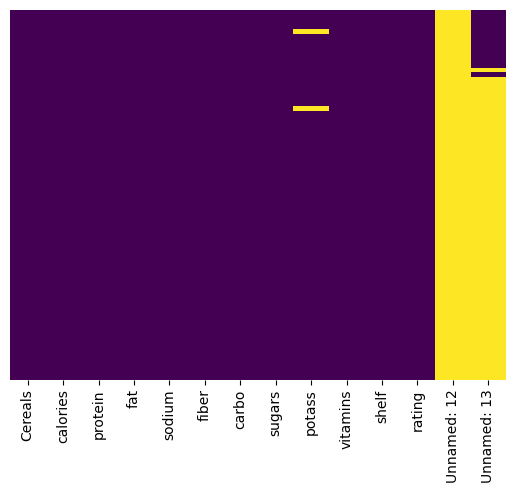

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cereals      77 non-null     object 
 1   calories     77 non-null     int64  
 2   protein      77 non-null     int64  
 3   fat          77 non-null     int64  
 4   sodium       77 non-null     int64  
 5   fiber        77 non-null     float64
 6   carbo        77 non-null     float64
 7   sugars       77 non-null     int64  
 8   potass       75 non-null     float64
 9   vitamins     77 non-null     int64  
 10  shelf        77 non-null     int64  
 11  rating       77 non-null     float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  13 non-null     object 
dtypes: float64(5), int64(7), object(2)
memory usage: 8.5+ KB


In [ ]:
df.corr(numeric_only=True)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating,Unnamed: 12
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.072063,0.265356,0.097234,-0.689376,NaN
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.563706,0.007335,0.133865,0.470618,NaN
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.200445,-0.031156,0.263691,-0.409284,NaN
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.042632,0.361477,-0.069719,-0.401295,NaN
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.911528,-0.032243,0.297539,0.584160,NaN
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.338301,0.258148,-0.101790,0.052055,NaN
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,-0.002600,0.125137,0.100438,-0.759675,NaN
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.338301,-0.002600,1.000000,-0.005427,0.385784,0.416009,NaN
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,-0.005427,1.000000,0.299262,-0.240544,NaN
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.385784,0.299262,1.000000,0.025159,NaN


#Preprocessing

##Missing value treatment

In [ ]:
df.drop(['Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)

In [ ]:
df = df.dropna(subset=['potass'])
print(df.shape)

(75, 12)


In [ ]:
df.isnull().sum()

,0
Cereals,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0
potass,0
vitamins,0


##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num = df.drop(['Cereals'], axis=1)
df_scaled = scaler.fit_transform(df_num)
df_scaled

array([[-1.88492081e+00,  1.32240270e+00, -1.33345187e-02,
        -3.60573947e-01,  3.26863902e+00, -2.24411825e+00,
        -2.27272727e-01,  2.59271124e+00, -1.64822911e-01,
         9.60768923e-01,  1.86742089e+00],
       [ 6.66867291e-01,  4.12492585e-01,  3.98702108e+00,
        -1.73362043e+00, -7.63778860e-02, -1.53693813e+00,
         2.27272727e-01,  5.19495450e-01, -1.28861548e+00,
         9.60768923e-01, -6.12486470e-01],
       [-1.88492081e+00,  1.32240270e+00, -1.33345187e-02,
         1.19156556e+00,  2.85051190e+00, -1.77266484e+00,
        -4.54545455e-01,  3.16463283e+00, -1.64822911e-01,
         9.60768923e-01,  1.22059504e+00],
       [-2.90563605e+00,  1.32240270e+00, -1.01342342e+00,
        -2.41178600e-01,  4.94114747e+00, -1.53693813e+00,
        -1.59090909e+00,  3.30761323e+00, -1.64822911e-01,
         9.60768923e-01,  3.69042356e+00],
       [ 1.56509670e-01, -4.97417529e-01,  9.86754382e-01,
         2.36402786e-01, -2.85441442e-01, -9.47621364e-01,
  

If you are using standardization (Z-score normalization) and some columns have negative values, this is perfectly fine and expected. Standardization does not restrict values to a specific range, such as [0, 1]. Instead, it transforms the data so that each feature has a mean of 0 and a standard deviation of 1, which often results in negative values for data points below the mean.

After standardization:

The mean of each column will be 0.
Values below the mean will be negative, and values above the mean will be positive.
Should You Worry About Negative Values?
No, it's completely normal to have negative values after standardization.
Negative values simply indicate that the original data points are below the mean.
When to Worry About Negative Values:
If your algorithm or model requires data in a specific range (like [0, 1]), then standardization may not be the best choice. In such cases, you might prefer min-max normalization.
However, for algorithms like K-means clustering, which use distance calculations, standardization is widely used and appropriate, even with negative values.
Conclusion:
You don't need to do anything extra if some columns have negative values after standardization. The presence of negative values is expected and not a problem for clustering algorithms like K-means.








# Elbow Plot to identify best K

In [ ]:
wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(df_scaled)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

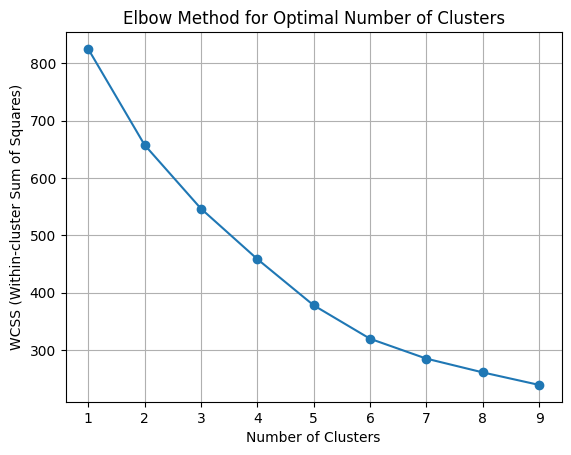

In [ ]:
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

Optimal K = 3. This is where the within-cluster sum of squares (WCSS) starts to decrease at a slower rate.

#Kmeans: K=3

In [ ]:
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(df_scaled)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 2, 0, 0, 2, 2, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating,cluster
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.0,25,3,68.402973,2
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.0,0,3,33.983679,1
2,All-Bran,70,4,1,260,9.0,7.0,5,320.0,25,3,59.425505,2
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.0,25,3,93.704912,2
5,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10,70.0,25,1,29.509541,0


In [ ]:
km.cluster_centers_

array([[ 0.12557891, -0.77314787, -0.22547459,  0.42815895, -0.67189226,
         0.17029469,  0.35812672, -0.7348326 ,  0.14166597, -0.38576328,
        -0.66306071],
       [ 1.0871618 ,  0.51954083,  1.04558314, -0.03399256,  0.46472779,
        -0.06711278,  0.61497326,  0.86433053,  0.16570432,  0.89012415,
        -0.37305373],
       [-0.90503418,  0.66726742, -0.41337008, -0.54205487,  0.57088288,
        -0.1791523 , -0.89090909,  0.38223427, -0.29967802, -0.09607689,
         1.12891667]])

#Cluster Description

In [ ]:
df[['calories', 'sugars', 'fiber', 'fat', 'protein', 'cluster']].groupby('cluster').mean(numeric_only=True)

,calories,sugars,fiber,fat,protein
cluster,,,,,
0,109.393939,8.575758,0.575758,0.787879,1.696970
1,128.235294,9.705882,3.294118,2.058824,3.117647
2,89.200000,3.080000,3.548000,0.600000,3.280000


In [ ]:
# Calculate the mean values for each feature within each cluster
cluster_means = df.groupby('cluster').mean(numeric_only=True)

# Calculate overall percentiles for comparison
overall_p35 = df.quantile(0.35, numeric_only=True)
overall_p65 = df.quantile(0.65, numeric_only=True)
print("Overall Percentile 35th:")
print(overall_p35[['calories', 'sugars', 'fiber', 'fat', 'protein']])
print("\nOverall Percentile 65th:")
print(overall_p65[['calories', 'sugars', 'fiber', 'fat', 'protein']])

Overall Percentile 35th:
calories    100.0
sugars        5.0
fiber         1.0
fat           0.9
protein       2.0
Name: 0.35, dtype: float64

Overall Percentile 65th:
calories    110.0
sugars        9.1
fiber         3.0
fat           1.0
protein       3.0
Name: 0.65, dtype: float64


In [ ]:
# Initialize a dictionary to store descriptions for each cluster
descriptions = {}

# Iterate over each cluster to generate descriptions
for cluster_id in cluster_means.index:
    description = []

    # Compare cluster feature means with percentile thresholds and generate descriptions
    if cluster_means.loc[cluster_id, 'calories'] < overall_p35['calories']:
        description.append("low in calories")
    elif cluster_means.loc[cluster_id, 'calories'] > overall_p65['calories']:
        description.append("high in calories")

    if cluster_means.loc[cluster_id, 'sugars'] < overall_p35['sugars']:
        description.append("low in sugars")
    elif cluster_means.loc[cluster_id, 'sugars'] > overall_p65['sugars']:
        description.append("high in sugars")

    if cluster_means.loc[cluster_id, 'fiber'] > overall_p65['fiber']:
        description.append("high in fiber")
    elif cluster_means.loc[cluster_id, 'fiber'] < overall_p35['fiber']:
        description.append("low in fiber")

    if cluster_means.loc[cluster_id, 'fat'] < overall_p35['fat']:
        description.append("low in fat")
    elif cluster_means.loc[cluster_id, 'fat'] > overall_p65['fat']:
        description.append("high in fat")

    if cluster_means.loc[cluster_id, 'protein'] > overall_p65['protein']:
        description.append("high in protein")
    elif cluster_means.loc[cluster_id, 'protein'] < overall_p35['protein']:
        description.append("low in protein")

    # Add the description to the dictionary with the cluster ID as the key
    descriptions[cluster_id] = description

# Print out the descriptions for each cluster
for cluster_id, desc in descriptions.items():
    print(f"Cluster {cluster_id} is characterized as: {', '.join(desc)}")


Cluster 0 is characterized as: low in fiber, low in fat, low in protein
Cluster 1 is characterized as: high in calories, high in sugars, high in fiber, high in fat, high in protein
Cluster 2 is characterized as: low in calories, low in sugars, high in fiber, low in fat, high in protein
